In [66]:
import math
import numpy as np
import matplotlib.pyplot as plt
import uproot as ur
'''
Calculates the energy and momentum of particles 1 and 2 in the decay process
0 --> 1 + 2 in the rest frame of particle 0
'''
def rest_E_p(m0, m1, m2):
    E1 = (m0**2+m1**2-m2**2)/(2*m0)
    E2 = (m0**2+m2**2-m1**2)/(2*m0)
    p1 = math.sqrt(E1**2-m1**2)
    p2 = math.sqrt(E2**2-m2**2)
    result_lst = []
    result_lst.append(E1) 
    result_lst.append(E2)
    result_lst.append(p1)
    result_lst.append(p2)
    
    return result_lst


def moving_E_p(p0, m0, m1, m2, theta0):
    E1, E2, p1, p2 = rest_E_p(m0, m1, m2)[:4] # Quantities in B0 rest frame
    E0 = math.sqrt(p0**2+m0**2)
    gamma = E0/m0
    v0 = p0/E0
    p1mx = p1*math.sin(theta0)
    p1mz = gamma*(p1*math.cos(theta0)+v0*E1)
    
    p2mx = -p1*math.sin(theta0)
    p2mz = gamma*(-p1*math.cos(theta0)+v0*E2)
    
   
    p1m = math.sqrt(p1mx**2+p1mz**2)
    p2m = math.sqrt(p2mx**2+p2mz**2)
    
    return(p0, gamma, v0, p1m, p2m)

In [86]:
#rest_E_p(1.115683, 0.938, 0.1396)
rest_E_p(5.279, 0.494, 0.548)

moving_E_p(0.4, 1.115683, 0.938, 0.1396,math.pi)
moving_E_p(2500, 5.279, 0.494, 0.548, math.pi)

(2500,
 473.5755964315187,
 0.9999977705801755,
 22.130161997418963,
 2477.869838002581)

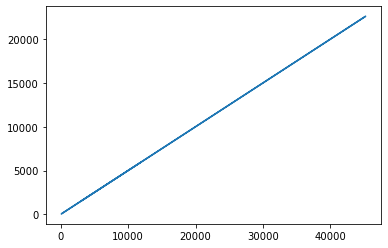

In [84]:
datafile = ur.open("./DVntuple4-Copy1.root")
events = datafile['MCDecayTreeTuple/MCDecayTree;1']
B0_pt = events["B0_PT"]
B0_pt = B0_pt.array(library="np")
y_vals = []

for i in range(len(B0_pt)):
    y_vals.append(moving_E_p(B0_pt[i], 5.279, 0.494, 0.548, (math.pi*3)/2)[4])
    
y_vals = np.array(y_vals)
plt.figure()
plt.plot(B0_pt, y_vals)